2.1 Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

In [1]:
# Import modules
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
%matplotlib inline

In [2]:
# Load the netCDF4 file
ds = xr.open_dataset("NOAA_NCDC_ERSST_v3b_SST.nc", engine="netcdf4")
ds

# Use the latest monthly data
sst_latest = ds.sst.isel(time=-1)
sst_latest

<xarray.DataArray 'sst' (lat: 89, lon: 180)>
array([[      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       [      nan,       nan,       nan, ...,       nan,       nan,       nan],
       ...,
       [-1.743628, -1.735732, -1.73407 , ..., -1.784675, -1.768673, -1.754007],
       [-1.758584, -1.75407 , -1.753083, ..., -1.774842, -1.768702, -1.762939],
       [-1.77696 , -1.77429 , -1.773271, ..., -1.784007, -1.780863, -1.778284]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 ... 82.0 84.0 86.0 88.0
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 ... 350.0 352.0 354.0 356.0 358.0
    time     datetime64[ns] 2016-12-15
Attributes:
    pointwidth:          1.0
    valid_min:           -3.0
    valid_max:           45.0
    units:               degree_Celsius
    long_name:           Extended reconstructed sea surface temperature
    standard_name:       sea_surface_temperature
    iridl:hasSemantics:  iridl:SeaSurfaceTemperature

D:\Anaconda\envs\ese5023\lib\site-packages\cartopy\crs.py:825: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
D:\Anaconda\envs\ese5023\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
D:\Anaconda\envs\ese5023\lib\site-packages\cartopy\crs.py:836: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
D:\Anaconda\envs\ese5023\lib\site-packages\cartopy\crs.py:877: ShapelyD

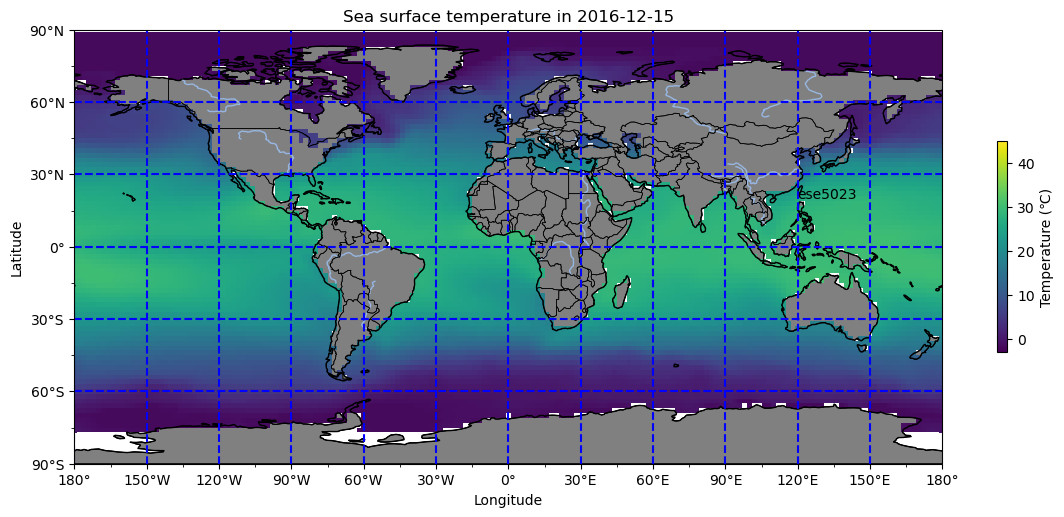

In [3]:
#创建画布以及axes(GeoAxes)
proj = ccrs.PlateCarree() #定义PlateCarree投影
fig = plt.figure(figsize=(14,7),dpi=100)
ax = fig.add_subplot(1,1,1, projection= proj)

#优化地图显示
ax.coastlines() #绘制海岸线
ax.set_global() #让地图的显示范围扩展至投影的最大范围

#设置 x,y ticks，引自：https://zhajiman.github.io/post/cartopy_introduction/
#设置大小刻度
tick_proj = ccrs.PlateCarree()
ax.set_xticks(np.arange(-180, 180 + 30, 30), crs=tick_proj)
ax.set_xticks(np.arange(-180, 180 + 15, 15), minor=True, crs=tick_proj) #设置小刻度
ax.set_yticks(np.arange(-90, 90 + 30, 30), crs=tick_proj)
ax.set_yticks(np.arange(-90, 90 + 15, 15), minor=True, crs=tick_proj) #设置小刻度
#利用Formatter格式化刻度标签
ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

#设置gridlines：引自：https://zhajiman.github.io/post/cartopy_introduction/
gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=1.5, color='blue', linestyle='--')
gl.xlocator = mpl.ticker.FixedLocator(np.arange(-180, 180, 30))
gl.ylocator = mpl.ticker.FixedLocator(np.arange(-90, 90, 30))


#设置colorbar,legend
sst_latest.plot(ax=ax,transform=ccrs.PlateCarree(),
         vmin=-3.0, vmax=45.0, cbar_kwargs={'shrink': 0.4,'label': 'Temperature (℃)'})
#设置title: Sea surface temperature in 2016-12-15
plt.title('Sea surface temperature in 2016-12-15')

#设置Mask land,revers
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='grey',linewidths=0.5)
ax.add_feature(cfeature.RIVERS)

# 添加国家的边境线
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural',
                                           name='admin_0_countries',
                                           scale='110m',
                                           facecolor='none',
                                           edgecolor='black',
                                           linewidth=0.5))

#设置x,y label
plt.xlabel("Longitude")
plt.ylabel("Latitude")

#设置annotation和文本
plt.annotate(s='ese5023',xy=(120,20) ,xytext=(120,20))

plt.savefig('Sea surface temperature in 2016-12-15 globally.png', dpi=300, bbox_inches='tight')
plt.show()

2.2 Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

C:\Users\ADMINI~1\AppData\Local\Temp/ipykernel_15632/1044387350.py:36: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s='ese5023',xy=(120,20) ,xytext=(120,20))


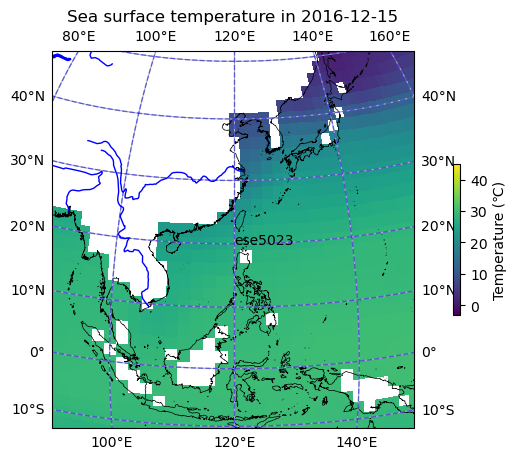

In [5]:
# Create and define the size of a figure object 
plt.figure(figsize=(10,5), dpi=100)

# Set Orthographic projection style
central_lon, central_lat = 120, 20
proj = ccrs.Orthographic(central_lon, central_lat) 

# Create an axes with Orthographic projection style
ax = plt.axes(projection=proj)

# Set a region and plot
extent = [central_lon-30, central_lon+30, central_lat-30, central_lat+30]
ax.set_extent(extent)

# 设置feature
ax.add_feature(cfeature.LAKES, edgecolor='blue', facecolor='blue', zorder=2)
ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=3)

ax.coastlines(resolution='10m', linewidth=0.5)

#设置gridlines
ax.gridlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(),draw_labels=True,linewidth=1, color='blue',linestyle='--',alpha=0.5)

#设置colorbars
sst_latest.plot(ax=ax,transform=ccrs.PlateCarree(),
         vmin=-3.0, vmax=45.0, cbar_kwargs={'shrink': 0.4,'label': 'Temperature (℃)'})

#设置x,y ticks and label


#设置title
plt.title('Sea surface temperature in 2016-12-15')

#设置annotation和文本
plt.annotate(s='ese5023',xy=(120,20) ,xytext=(120,20))
plt.savefig('Sea surface temperature in 2016-12-15 in smaller region.png', dpi=300, bbox_inches='tight')
plt.show()